In [54]:
# imports
import pandas as pd
import requests
import time
import datetime

In [55]:
# set display options 
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_colwidth', None)

In [56]:
# read in combined csv file
df = pd.read_csv('./data/combined.csv')

In [57]:
df.shape

(31913, 27)

In [58]:
df.head()

,noticeId,title,solicitationNumber,department,subTier,office,postedDate,type,baseType,archiveType,archiveDate,typeOfSetAsideDescription,typeOfSetAside,responseDeadLine,naicsCode,classificationCode,active,award,pointOfContact,description,organizationType,officeAddress,placeOfPerformance,additionalInfoLink,uiLink,links,resourceLinks
0,ffe3c07bab8b4a7d9be583fd4dd96c4a,REQUEST FOR INFORMATION - NEW DESIGN BOOKLET DIE CUTTING INSERT ASSEMBLY,RFI-042720,UNITED STATES GOVERNMENT PUBLISHING OFFICE,UNITED STATES GOVERNMENT PUBLISHING OFFICE,Acquisition Services,2020-04-27,Sources Sought,Sources Sought,auto15,2020-05-27,NaN,NaN,2020-05-12T14:00:00-04:00,333244.0,3610,Yes,NaN,"[{'fax': '', 'type': 'primary', 'email': 'rgraham@gpo.gov', 'phone': '2025120032', 'title': None, 'fullName': 'Rosalyn Graham'}, {'fax': '', 'type': 'secondary', 'email': 'rortega@gpo.gov', 'phone': '2025120803', 'title': None, 'fullName': 'Ronald Ortega'}]",https://api.sam.gov/prod/opportunities/v1/noticedesc?noticeid=ffe3c07bab8b4a7d9be583fd4dd96c4a,OFFICE,"{'zipcode': '20401', 'city': 'Washington', 'countryCode': 'USA', 'state': 'DC'}","{'state': {'code': 'DC', 'name': 'District of Columbia'}, 'zip': '20401', 'country': {'code': 'USA', 'name': 'UNITED STATES'}}",NaN,https://beta.sam.gov/opp/ffe3c07bab8b4a7d9be583fd4dd96c4a/view,"[{'rel': 'self', 'href': 'https://api.sam.gov/prod/opportunities/v1/search?noticeid=ffe3c07bab8b4a7d9be583fd4dd96c4a&limit=1', 'hreflang': None, 'media': None, 'title': None, 'type': None, 'deprecation': None}]","['https://beta.sam.gov/api/prod/opps/v3/opportunities/resources/files/bd2b3b5e86474278ae1ea1a163ccbfd7/download?api_key=null&token=', 'https://beta.sam.gov/api/prod/opps/v3/opportunities/resources/files/774a16e89e4d431e85b0eba1a510a24c/download?api_key=null&token=', 'https://beta.sam.gov/api/prod/opps/v3/opportunities/resources/files/b62d72d82537413f8537bb19160d49bd/download?api_key=null&token=']"
1,ff5e29951ed14b0386ea3291fa6c573f,Audiovisual Suite for Large Auditorium - Maxwell AFB,FA330020X0001,DEPT OF DEFENSE,DEPT OF THE AIR FORCE,FA3300 42 CONS CC,2020-04-27,Sources Sought,Sources Sought,auto15,2020-05-20,NaN,NaN,2020-05-05T12:00:00-05:00,334310.0,5836,Yes,NaN,"[{'fax': '3349532198', 'type': 'primary', 'email': 'brandon.osborne.6@us.af.mil', 'phone': '3349537835', 'title': None, 'fullName': 'Brandon Osborne'}, {'fax': '3349532198', 'type': 'secondary', 'email': 'jeremy.kersey.1@us.af.mil', 'phone': '3349533526', 'title': None, 'fullName': 'Jeremy B. Kersey'}]",https://api.sam.gov/prod/opportunities/v1/noticedesc?noticeid=ff5e29951ed14b0386ea3291fa6c573f,OFFICE,"{'zipcode': '36112-6334', 'city': 'MAXWELL AFB', 'countryCode': 'USA', 'state': 'AL'}","{'city': {'code': '51000', 'name': 'Montgomery'}, 'state': {'code': 'AL', 'name': 'Alabama'}, 'zip': '36112', 'country': {'code': 'USA', 'name': 'UNITED STATES'}}",NaN,https://beta.sam.gov/opp/ff5e29951ed14b0386ea3291fa6c573f/view,"[{'rel': 'self', 'href': 'https://api.sam.gov/prod/opportunities/v1/search?noticeid=ff5e29951ed14b0386ea3291fa6c573f&limit=1', 'hreflang': None, 'media': None, 'title': None, 'type': None, 'deprecation': None}]",['https://beta.sam.gov/api/prod/opps/v3/opportunities/resources/files/c2a6338838ed4ebfa7d70e91221ffc21/download?api_key=null&token=']
2,ff2a16aad70246d1ba10e639c11456d4,Metrology Equipment Move,SP4703-20-Q-0045,DEPT OF DEFENSE,DEFENSE LOGISTICS AGENCY (DLA),DCSO RICHMOND,2020-04-27,Combined Synopsis/Solicitation,Combined Synopsis/Solicitation,auto15,2020-05-19,Total Small Business Set-Aside (FAR 19.5),SBA,2020-05-04T15:00:00-04:00,238990.0,Z1PZ,Yes,NaN,"[{'fax': '', 'type': 'primary', 'email': 'Kiara.leslie@dla.mil', 'phone': '8042796566', 'title': None, 'fullName': 'Kiara Leslie'}, {'fax': '', 'type': 'secondary', 'email': 'mary.washington@dla.mil', 'phone': '8042795628', 'title': None, 'fullName': 'Mary A. Washington, Contracting Officer'}]",https://api.sam.gov/prod/opportunities/v1/noticedesc?noticeid=ff2a16aad70246d1ba10e639c11456d4,OFFICE,"

In [59]:
df.tail()

,noticeId,title,solicitationNumber,department,subTier,office,postedDate,type,baseType,archiveType,archiveDate,typeOfSetAsideDescription,typeOfSetAside,responseDeadLine,naicsCode,classificationCode,active,award,pointOfContact,description,organizationType,officeAddress,placeOfPerformance,additionalInfoLink,uiLink,links,resourceLinks
31908,34c8c74c20054b2ab9a456947f110f6d,"Remediation Services at the PR-58 Site in North Kingstown, RI",W912WJ20X0014,DEPT OF DEFENSE,DEPT OF THE ARMY,W2SD ENDIST NEW ENGLAND,2020-01-02,Sources Sought,Sources Sought,autocustom,2020-12-31,NaN,NaN,2020-01-24T15:00:00-05:00,562910.0,F108,Yes,NaN,"[{'fax': '', 'type': 'primary', 'email': 'heather.skorik@usace.army.mil', 'phone': '9783188040', 'title': None, 'fullName': 'Heather M. Skorik'}]",https://api.sam.gov/prod/opportunities/v1/noticedesc?noticeid=34c8c74c20054b2ab9a456947f110f6d,OFFICE,"{'zipcode': '01742-2751', 'city': 'CONCORD', 'countryCode': 'USA', 'state': 'MA'}","{'city': {'code': '51580', 'name': 'North Kingstown'}, 'state': {'code': 'RI', 'name': 'Rhode Island'}, 'country': {'code': 'USA', 'name': 'UNITED STATES'}}",NaN,https://beta.sam.gov/opp/34c8c74c20054b2ab9a456947f110f6d/view,"[{'rel': 'self', 'href': 'https://api.sam.gov/prod/opportunities/v1/search?noticeid=34c8c74c20054b2ab9a456947f110f6d&limit=1'}]",NaN
31909,256c9825d7744a2988be4cd52238c0d1,"SUBMIT A QUOTE TO PROVIDE, INSTALL, AND MAINTAIN A 10GBE (GIGABIT ETHERNET) OVER OTN (OTU-2) COMMERCIAL LEASE BETWEEN NAS JOINT RESERVE BASE NEW ORLEANS 400 RUSSELL AVENUE, NEW ORLEANS, LA, AND 3326 GENERAL HUDNELL DRIVE, SAN ANTONIO, TX.",HC101319QB215,DEPT OF DEFENSE,DEFENSE INFORMATION SYSTEMS AGENCY (DISA),DITCO-SCOTT,2020-01-02,Combined Synopsis/Solicitation,Combined Synopsis/Solicitation,autocustom,2020-07-03,NaN,NaN,2020-02-03T16:00:00-06:00,517311.0,D304,Yes,NaN,"[{'fax': '', 'type': 'primary', 'email': 'tamie.l.keene.civ@mail.mil', 'phone': '6184186549', 'title': None, 'fullName': 'Tamie L. Keene'}, {'fax': '', 'type': 'secondary', 'email': 'dale.l.rupright.civ@mail.mil', 'phone': '6184186614', 'title': None, 'fullName': 'Dale L. Rupright'}]",https://api.sam.gov/prod/opportunities/v1/noticedesc?noticeid=256c9825d7744a2988be4cd52238c0d1,OFFICE,"{'zipcode': '622255406', 'city': 'SCOTT AFB', 'countryCode': 'USA', 'state': 'IL'}",NaN,NaN,https://beta.sam.gov/opp/256c9825d7744a2988be4cd52238c0d1/view,"[{'rel': 'self', 'href': 'https://api.sam.gov/prod/opportunities/v1/search?noticeid=256c9825d7744a2988be4cd52238c0d1&limit=1'}]","['https://beta.sam.gov/api/prod/opps/v3/opportunities/resources/files/0dc0329db66849798cbc045f78ab780c/download?api_key=null&token=', 'https://beta.sam.gov/api/prod/opps/v3/opportunities/resources/files/5b69cfab364549e6acece95d0ad31b83/download?api_key=null&token=']"
31910,14c585fbe7c1461b868ded6ca82f7b8d,"PROVIDE, INSTALL, AND MAINTAIN A 2.488GB (OC48C) BETWEEN BLDG 3782, RM174, FL: 1, 1000 CHIEF’S WAY, CORRY STATION, PENSACOLA, FL 32511, AND BLDG 9357, RM 116, FL: 1, 8357 CYPRESS LOOP RD., STENNIS SPACE CENTER, MS 39529",HC101320QA222,DEPT OF DEFENSE,DEFENSE INFORMATION SYSTEMS AGENCY (DISA),DITCO-SCOTT,2020-01-02,Solicitation,Solicitation,autocustom,2021-02-03,NaN,NaN,2020-02-03T16:00:00-06:00,517311.0,D304,Yes,NaN,"[{'fax': None, 'type': 'primary', 'email': 'aaron.j.fuehne.civ@mail.mil', 'phone': '6184186817', 'title': None, 'fullName': 'Aaron Fuehne'}, {'fax': '', 'type': 'secondary', 'email': 'dale.l.rupright.civ@mail.mil', 'phone': '6184186614', 'title': None, 'fullName': 'Dale L. Rupright'}]",https://api.sam.gov/prod/opportunities/v1/noticedesc?noticeid=14c585fbe7c1461b868ded6ca82f7b8d,OFFICE,"{'zipcode': '622255406', 'city': 'SCOTT AFB', 'countryCode': 'USA', 'state': 'IL'}",NaN,NaN,https://beta.sam.gov/opp/14c585fbe7c1461b868ded6ca82f7b8d/view,"[{'rel': 'self', 'href': 'https://api.sam.gov/prod/opportunities/v1/search?noticeid=14c585fbe7c1461b868ded6ca82f7b8d&limit=1'}]",['https://beta.sam.gov/api/prod/opps/v3/opportunities/resources/files/2c623fece54f424

In [60]:
# find and drop duplicates
print('Number of duplicated rows:', df.loc[df.duplicated()].shape[0])

Number of duplicated rows: 1985


In [61]:
df = df.drop_duplicates()

In [62]:
# check number of rows after removing duplicates

print('Number of rows after removing duplicates:', df.shape[0])

Number of rows after removing duplicates: 29928


In [63]:
# export dataframe into csv file

df.to_csv('./data/combined.csv', index=False)

## EDA

In [64]:
# inspect data
# inspect data

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29928 entries, 0 to 31912
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   noticeId                   29928 non-null  object 
 1   title                      29928 non-null  object 
 2   solicitationNumber         29656 non-null  object 
 3   department                 29924 non-null  object 
 4   subTier                    29860 non-null  object 
 5   office                     29924 non-null  object 
 6   postedDate                 29928 non-null  object 
 7   type                       29928 non-null  object 
 8   baseType                   29928 non-null  object 
 9   archiveType                29928 non-null  object 
 10  archiveDate                29928 non-null  object 
 11  typeOfSetAsideDescription  10636 non-null  object 
 12  typeOfSetAside             10636 non-null  object 
 13  responseDeadLine           25186 non-null  obj

#### Missing Data

In [65]:
import matplotlib.pyplot as plt

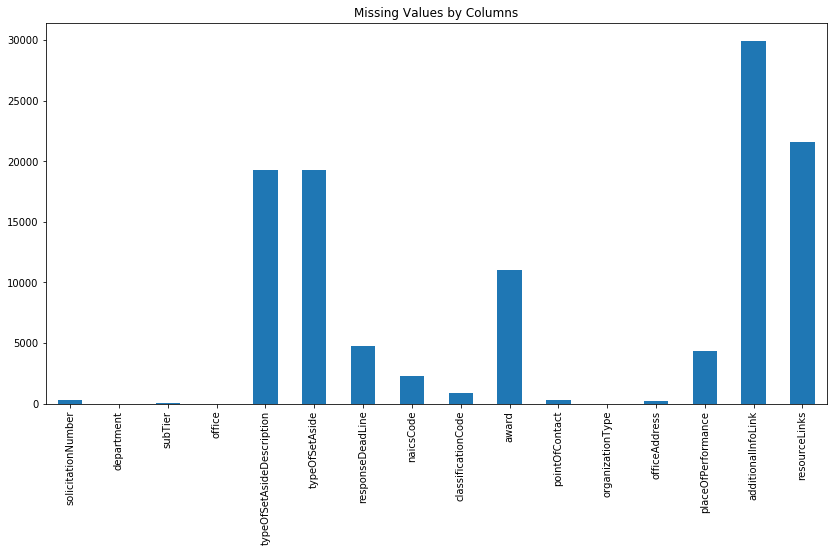

In [66]:
# create a plot that shows columns with missing values

# columns with missing values
cols_w_missings = df.loc[:, df.isna().sum() > 0]

# plot missing data
# set figsize
plt.figure(figsize=(14, 7))
# set title
plt.title('Missing Values by Columns')   
# plot the number of missing values in each column
cols_w_missings.isna().sum().plot(kind='bar');

In [67]:
# prints
print(f'Number of observations: {df.shape[0]}')
print('')
print('Number of missing values:')
for i in range(len(cols_w_missings.columns)):
    print(f'    {cols_w_missings.columns[i]} column\
    = {cols_w_missings[cols_w_missings.columns[i]].isna().sum()}')

Number of observations: 29928

Number of missing values:
    solicitationNumber column    = 272
    department column    = 4
    subTier column    = 68
    office column    = 4
    typeOfSetAsideDescription column    = 19292
    typeOfSetAside column    = 19292
    responseDeadLine column    = 4742
    naicsCode column    = 2311
    classificationCode column    = 864
    award column    = 11052
    pointOfContact column    = 325
    organizationType column    = 4
    officeAddress column    = 201
    placeOfPerformance column    = 4314
    additionalInfoLink column    = 29928
    resourceLinks column    = 21603


In [68]:
# additionalInfoLink column has no values
# drop additionalInfoLink column
df.drop('additionalInfoLink', axis=1, inplace=True)

### Text Data EDA

#### Tokenizing title column

In [69]:
# inspect title column

df['title'].head(15)

0             REQUEST FOR INFORMATION - NEW DESIGN BOOKLET DIE CUTTING INSERT ASSEMBLY
1                                 Audiovisual Suite for Large Auditorium - Maxwell AFB
2                                                             Metrology Equipment Move
3                                                    INNER INFLATABLE ASSY (LPU-36A/P)
4                                                                           17--CRADLE
5                                                              43--FILTER ELEMENT,FLUI
6                                                              61--CABLE ASSEMBLY,SPEC
7                                                              30--GEAR SET,SPUR,MATCH
8                                                              53--NUT,SELF-LOCKING,EX
9                                            6640--Notice of Intent to Sole Source    
10                                                         Residual Leukocyte Counters
11                                         

In [70]:
df['title'].tail(15)

31898                                                                                                                                                                                                             QUARTERLY REQUIREMENTS, BREAD, 2ND QTR., FY 2020
31899                                                                                                                                                                    R--Request for Quotation (RFQ) Certified Industrial Hygienist Air Quality Survey Services
31900                                                                                                                                                                                                                                           FITTING ASSY, FUEL
31901                                                                                                                                                                                                             Weapons and S

In [71]:
from nltk.tokenize import RegexpTokenizer

In [72]:
# define function to tokenize a column

def tokenizer_function(column):
    """
    Takes in a text column
        tokenizes the text in each row
        using pattern [[a-zA-Z]\w+]
        which matches every lowercase and upperase character between a-z that are word characters
    Returns list of strings
    """
    
    # instantiate empty list of tokenized text
    texts = []
    
    # instantiate tokenizer
    tokenizer = RegexpTokenizer('[a-zA-Z]\w+')
    
    # create for loop to tokenize each row and add the list of tokens to texts
    for text in column:
        tokens = tokenizer.tokenize(text)
        
        # transform tokens into lower case strings
        tokens = [token.lower() for token in tokens]
        texts.append(tokens)
    return pd.Series(texts)

In [73]:
# call tokenizer function on df['title']

tokenizer_function(df['title'])

0                                                                                                                                                                           [request, for, information, new, design, booklet, die, cutting, insert, assembly]
1                                                                                                                                                                                                  [audiovisual, suite, for, large, auditorium, maxwell, afb]
2                                                                                                                                                                                                                                [metrology, equipment, move]
3                                                                                                                                                                                                                              [inner, inflata

### Overall EDA

**Explore the Type of Award Notices**

In [74]:
# find count unique values of df['type']
df['type'].value_counts(normalize=True)

Combined Synopsis/Solicitation    0.425989
Presolicitation                   0.156375
Solicitation                      0.145616
Award Notice                      0.098804
Sources Sought                    0.086975
Special Notice                    0.063452
Justification                     0.022153
Sale of Surplus Property          0.000635
Name: type, dtype: float64

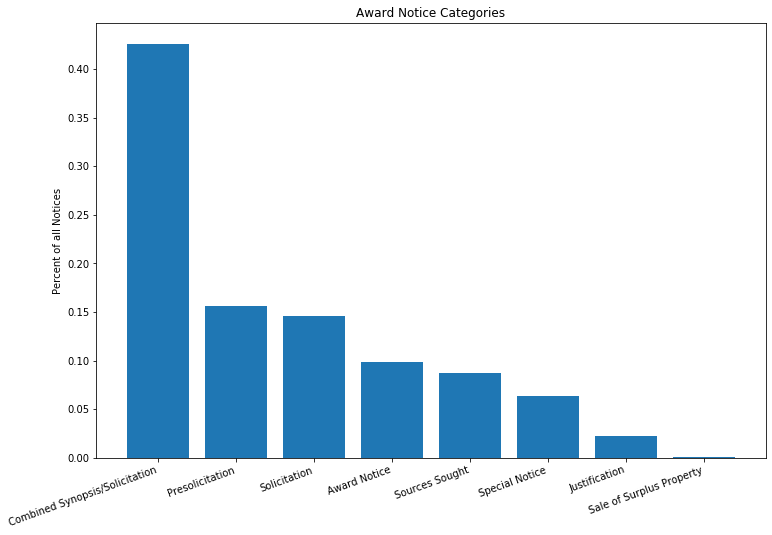

In [75]:
# find count unique values of df['type']

fig = plt.figure(figsize=(12, 8))
plt.title('Award Notice Categories')
plt.xticks(rotation=20, ha='right')
plt.ylabel('Percent of all Notices')
plt.bar(df['type'].value_counts().index, df['type'].value_counts(normalize=True));

# xticks rotation source: https://kite.com/python/answers/how-to-rotate-date-ticks-using-matplotlib-in-python
# xticks alignment source: https://stackoverflow.com/questions/14852821/aligning-rotated-xticklabels-with-their-respective-xticks

In [76]:
# combine solicitation notices with combined synopsis and soliciation notices
# this gives back the percent of notices that solicit applications for award

print(f"Percent of all soliciation notices: \
{round(df['type'].value_counts(normalize=True)['Combined Synopsis/Solicitation'] + df['type'].value_counts(normalize=True)['Solicitation'], 4)}\
")

Percent of all soliciation notices: 0.5716


*Observation:* combined synopsis and solicitation is about 46% of all Notices. When we combine all types of solicitations, 58.7% of all notices is soliciting for a submission. 

*Note:* Special Notice may contain combined sysnopsis and soliciation, and presolicitation may be sources sought. 

**Eplore Notices by Departments**

In [77]:
df['department'].value_counts(normalize=True)

DEPT OF DEFENSE                                                          0.755280
VETERANS AFFAIRS, DEPARTMENT OF                                          0.087388
INTERIOR, DEPARTMENT OF THE                                              0.025297
HOMELAND SECURITY, DEPARTMENT OF                                         0.021621
JUSTICE, DEPARTMENT OF                                                   0.019616
AGRICULTURE, DEPARTMENT OF                                               0.019282
HEALTH AND HUMAN SERVICES, DEPARTMENT OF                                 0.012097
GENERAL SERVICES ADMINISTRATION                                          0.011863
NATIONAL AERONAUTICS AND SPACE ADMINISTRATION                            0.008087
TRANSPORTATION, DEPARTMENT OF                                            0.006517
COMMERCE, DEPARTMENT OF                                                  0.006216
STATE, DEPARTMENT OF                                                     0.006216
AGENCY FOR INTER

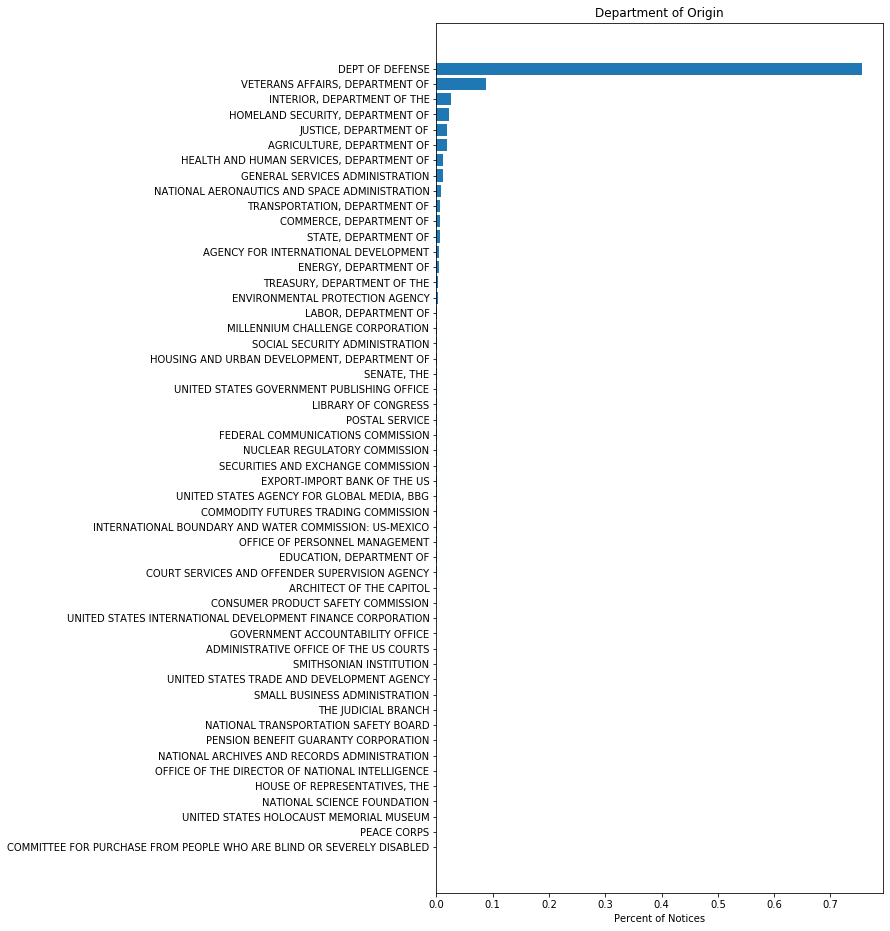

In [78]:
# majority of the notices originated from the Department of Defense
# plot
fig = plt.figure(figsize=(8, 16))
plt.title('Department of Origin')
plt.xlabel('Percent of Notices')
plt.barh(df['department'].value_counts().sort_values().index, 
         df['department'].value_counts(normalize=True).sort_values());


The Department of Defense has far the most award notices. Let's look at what subtiers are active in award solicitation.

In [79]:
# isolate the Department of Defense notices - and break it down by subtiers
df.loc[df['department'] == 'DEPT OF DEFENSE']['subTier'].value_counts(normalize=True)

DEFENSE LOGISTICS AGENCY (DLA)                                   0.540623
DEPT OF THE NAVY                                                 0.180724
DEPT OF THE ARMY                                                 0.166475
DEPT OF THE AIR FORCE                                            0.059740
DEFENSE INFORMATION SYSTEMS AGENCY (DISA)                        0.038720
DEFENSE ADVANCED RESEARCH PROJECTS AGENCY  (DARPA)               0.002036
DEFENSE COMMISSARY AGENCY  (DECA)                                0.001770
DEPT OF DEFENSE EDUCATION ACTIVITY (DODEA)                       0.001593
US SPECIAL OPERATIONS COMMAND (USSOCOM)                          0.001239
US TRANSPORTATION COMMAND (USTRANSCOM)                           0.001239
NATIONAL GEOSPATIAL-INTELLIGENCE AGENCY (NGA)                    0.000929
MISSILE DEFENSE AGENCY (MDA)                                     0.000797
WASHINGTON HEADQUARTERS SERVICES (WHS)                           0.000797
DEFENSE HEALTH AGENCY (DHA)           

In [80]:
# what type of notices are the most common for the Department of Defense
print('What are the most common types of contract notices coming from the Department of Defense?')
df.loc[df['department'] == 'DEPT OF DEFENSE']['type'].value_counts(normalize=True)

What are the most common types of contract notices coming from the Department of Defense?


Combined Synopsis/Solicitation    0.491704
Solicitation                      0.142250
Presolicitation                   0.141808
Award Notice                      0.095527
Sources Sought                    0.063847
Special Notice                    0.045352
Justification                     0.018672
Sale of Surplus Property          0.000841
Name: type, dtype: float64

In [81]:
# find all the combined synopsis/ solicitation notices and the solicitation notices
# output the departments that are soliciting for submission
print('Which department has most often published contract solicitations between March 1 and May 22?')
df.loc[(df['type'] == 'Combined Synopsis/Solicitation') | (df['type'] == 'Solicitation')]['department']\
.value_counts(normalize=True)

Which department has most often published contract solicitations between March 1 and May 22?


DEPT OF DEFENSE                                                0.837601
VETERANS AFFAIRS, DEPARTMENT OF                                0.041038
HOMELAND SECURITY, DEPARTMENT OF                               0.021571
INTERIOR, DEPARTMENT OF THE                                    0.021513
AGRICULTURE, DEPARTMENT OF                                     0.018882
JUSTICE, DEPARTMENT OF                                         0.015725
HEALTH AND HUMAN SERVICES, DEPARTMENT OF                       0.007074
STATE, DEPARTMENT OF                                           0.005671
AGENCY FOR INTERNATIONAL DEVELOPMENT                           0.005437
GENERAL SERVICES ADMINISTRATION                                0.004151
TRANSPORTATION, DEPARTMENT OF                                  0.003858
COMMERCE, DEPARTMENT OF                                        0.003391
ENERGY, DEPARTMENT OF                                          0.002864
NATIONAL AERONAUTICS AND SPACE ADMINISTRATION                  0

In [82]:
# # find all the combined synopsis/ solicitation notices and the solicitation notices
# output the subtiers within departments that are soliciting for submission
print('Which subtier has most often published contract solicitations between March 1 and May 22?')
df.loc[(df['type'] == 'Combined Synopsis/Solicitation') | (df['type'] == 'Solicitation')]['subTier']\
.value_counts(normalize=True)

Which subtier has most often published contract solicitations between March 1 and May 22?


DEFENSE LOGISTICS AGENCY (DLA)                           0.539752
DEPT OF THE ARMY                                         0.116918
DEPT OF THE NAVY                                         0.114872
VETERANS AFFAIRS, DEPARTMENT OF                          0.041038
DEFENSE INFORMATION SYSTEMS AGENCY (DISA)                0.033088
                                                           ...   
OFFICE OF SURFACE MINING, RECLAMATION AND ENFORCEMENT    0.000058
US SECRET SERVICE                                        0.000058
FEDERAL ENERGY REGULATORY COMMISSION                     0.000058
CONSUMER PRODUCT SAFETY COMMISSION                       0.000058
MINE SAFETY AND HEALTH ADMINISTRATION                    0.000058
Name: subTier, Length: 114, dtype: float64

In [83]:
# find all award notices
# output frequency by deparments
print('Which department published the most award notice during this year?')
df.loc[df['type'] == 'Award Notice']['department'].value_counts(normalize=True)

Which department published the most award notice during this year?


DEPT OF DEFENSE                                  0.730132
VETERANS AFFAIRS, DEPARTMENT OF                  0.106865
JUSTICE, DEPARTMENT OF                           0.044302
HOMELAND SECURITY, DEPARTMENT OF                 0.031451
AGRICULTURE, DEPARTMENT OF                       0.018262
GENERAL SERVICES ADMINISTRATION                  0.017924
INTERIOR, DEPARTMENT OF THE                      0.017585
HEALTH AND HUMAN SERVICES, DEPARTMENT OF         0.011836
STATE, DEPARTMENT OF                             0.006087
COMMERCE, DEPARTMENT OF                          0.003720
NATIONAL AERONAUTICS AND SPACE ADMINISTRATION    0.003044
ENERGY, DEPARTMENT OF                            0.002367
TRANSPORTATION, DEPARTMENT OF                    0.001691
ENVIRONMENTAL PROTECTION AGENCY                  0.001691
AGENCY FOR INTERNATIONAL DEVELOPMENT             0.000676
NUCLEAR REGULATORY COMMISSION                    0.000338
TREASURY, DEPARTMENT OF THE                      0.000338
SMALL BUSINESS

In [84]:
# find all Sources Sought notices
# output frequency by deparments
print('Which department published the most solicitation for interest during this year?')
df.loc[df['type'] == 'Sources Sought']['department'].value_counts(normalize=True)

Which department published the most solicitation for interest during this year?


DEPT OF DEFENSE                                  0.555000
VETERANS AFFAIRS, DEPARTMENT OF                  0.236538
GENERAL SERVICES ADMINISTRATION                  0.033462
INTERIOR, DEPARTMENT OF THE                      0.033077
HEALTH AND HUMAN SERVICES, DEPARTMENT OF         0.025385
HOMELAND SECURITY, DEPARTMENT OF                 0.023077
TRANSPORTATION, DEPARTMENT OF                    0.015385
AGRICULTURE, DEPARTMENT OF                       0.012692
COMMERCE, DEPARTMENT OF                          0.011154
JUSTICE, DEPARTMENT OF                           0.010000
NATIONAL AERONAUTICS AND SPACE ADMINISTRATION    0.008846
ENERGY, DEPARTMENT OF                            0.008462
TREASURY, DEPARTMENT OF THE                      0.006154
STATE, DEPARTMENT OF                             0.005000
AGENCY FOR INTERNATIONAL DEVELOPMENT             0.003077
SENATE, THE                                      0.002692
LABOR, DEPARTMENT OF                             0.002692
ENVIRONMENTAL 

In [85]:
df.head()

,noticeId,title,solicitationNumber,department,subTier,office,postedDate,type,baseType,archiveType,archiveDate,typeOfSetAsideDescription,typeOfSetAside,responseDeadLine,naicsCode,classificationCode,active,award,pointOfContact,description,organizationType,officeAddress,placeOfPerformance,uiLink,links,resourceLinks
0,ffe3c07bab8b4a7d9be583fd4dd96c4a,REQUEST FOR INFORMATION - NEW DESIGN BOOKLET DIE CUTTING INSERT ASSEMBLY,RFI-042720,UNITED STATES GOVERNMENT PUBLISHING OFFICE,UNITED STATES GOVERNMENT PUBLISHING OFFICE,Acquisition Services,2020-04-27,Sources Sought,Sources Sought,auto15,2020-05-27,NaN,NaN,2020-05-12T14:00:00-04:00,333244.0,3610,Yes,NaN,"[{'fax': '', 'type': 'primary', 'email': 'rgraham@gpo.gov', 'phone': '2025120032', 'title': None, 'fullName': 'Rosalyn Graham'}, {'fax': '', 'type': 'secondary', 'email': 'rortega@gpo.gov', 'phone': '2025120803', 'title': None, 'fullName': 'Ronald Ortega'}]",https://api.sam.gov/prod/opportunities/v1/noticedesc?noticeid=ffe3c07bab8b4a7d9be583fd4dd96c4a,OFFICE,"{'zipcode': '20401', 'city': 'Washington', 'countryCode': 'USA', 'state': 'DC'}","{'state': {'code': 'DC', 'name': 'District of Columbia'}, 'zip': '20401', 'country': {'code': 'USA', 'name': 'UNITED STATES'}}",https://beta.sam.gov/opp/ffe3c07bab8b4a7d9be583fd4dd96c4a/view,"[{'rel': 'self', 'href': 'https://api.sam.gov/prod/opportunities/v1/search?noticeid=ffe3c07bab8b4a7d9be583fd4dd96c4a&limit=1', 'hreflang': None, 'media': None, 'title': None, 'type': None, 'deprecation': None}]","['https://beta.sam.gov/api/prod/opps/v3/opportunities/resources/files/bd2b3b5e86474278ae1ea1a163ccbfd7/download?api_key=null&token=', 'https://beta.sam.gov/api/prod/opps/v3/opportunities/resources/files/774a16e89e4d431e85b0eba1a510a24c/download?api_key=null&token=', 'https://beta.sam.gov/api/prod/opps/v3/opportunities/resources/files/b62d72d82537413f8537bb19160d49bd/download?api_key=null&token=']"
1,ff5e29951ed14b0386ea3291fa6c573f,Audiovisual Suite for Large Auditorium - Maxwell AFB,FA330020X0001,DEPT OF DEFENSE,DEPT OF THE AIR FORCE,FA3300 42 CONS CC,2020-04-27,Sources Sought,Sources Sought,auto15,2020-05-20,NaN,NaN,2020-05-05T12:00:00-05:00,334310.0,5836,Yes,NaN,"[{'fax': '3349532198', 'type': 'primary', 'email': 'brandon.osborne.6@us.af.mil', 'phone': '3349537835', 'title': None, 'fullName': 'Brandon Osborne'}, {'fax': '3349532198', 'type': 'secondary', 'email': 'jeremy.kersey.1@us.af.mil', 'phone': '3349533526', 'title': None, 'fullName': 'Jeremy B. Kersey'}]",https://api.sam.gov/prod/opportunities/v1/noticedesc?noticeid=ff5e29951ed14b0386ea3291fa6c573f,OFFICE,"{'zipcode': '36112-6334', 'city': 'MAXWELL AFB', 'countryCode': 'USA', 'state': 'AL'}","{'city': {'code': '51000', 'name': 'Montgomery'}, 'state': {'code': 'AL', 'name': 'Alabama'}, 'zip': '36112', 'country': {'code': 'USA', 'name': 'UNITED STATES'}}",https://beta.sam.gov/opp/ff5e29951ed14b0386ea3291fa6c573f/view,"[{'rel': 'self', 'href': 'https://api.sam.gov/prod/opportunities/v1/search?noticeid=ff5e29951ed14b0386ea3291fa6c573f&limit=1', 'hreflang': None, 'media': None, 'title': None, 'type': None, 'deprecation': None}]",['https://beta.sam.gov/api/prod/opps/v3/opportunities/resources/files/c2a6338838ed4ebfa7d70e91221ffc21/download?api_key=null&token=']
2,ff2a16aad70246d1ba10e639c11456d4,Metrology Equipment Move,SP4703-20-Q-0045,DEPT OF DEFENSE,DEFENSE LOGISTICS AGENCY (DLA),DCSO RICHMOND,2020-04-27,Combined Synopsis/Solicitation,Combined Synopsis/Solicitation,auto15,2020-05-19,Total Small Business Set-Aside (FAR 19.5),SBA,2020-05-04T15:00:00-04:00,238990.0,Z1PZ,Yes,NaN,"[{'fax': '', 'type': 'primary', 'email': 'Kiara.leslie@dla.mil', 'phone': '8042796566', 'title': None, 'fullName': 'Kiara Leslie'}, {'fax': '', 'type': 'secondary', 'email': 'mary.washington@dla.mil', 'phone': '8042795628', 'title': None, 'fullName': 'Mary A. Washington, Contracting Officer'}]",https://api.sam.gov/prod/opportunities/v1/noticedesc?noticeid=ff2a16aad70246d1ba10e639c11456d4,OFFICE,"{'zipcode': '23297-5441', '

In [86]:
# look at types of set aside, especially among the solicitations
# check if we can see the awardee names, city/ state of business location